1- Importing the required packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime as dt

2- Importing Dataset and checking for missing values & data type

In [2]:
df = pd.read_csv("D:\Datasets\E-scooter trips 2020\E-Scooter_Trips_-_2020.csv",parse_dates=['Start Time','End Time'])

In [3]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630816 entries, 0 to 630815
Data columns (total 16 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   Trip ID                      630816 non-null  object        
 1   Start Time                   630816 non-null  datetime64[ns]
 2   End Time                     630816 non-null  datetime64[ns]
 3   Trip Distance                630816 non-null  object        
 4   Trip Duration                630816 non-null  object        
 5   Vendor                       630816 non-null  object        
 6   Start Community Area Number  629934 non-null  float64       
 7   End Community Area Number    629598 non-null  float64       
 8   Start Community Area Name    629934 non-null  object        
 9   End Community Area Name      629598 non-null  object        
 10  Start Centroid Latitude      629934 non-null  float64       
 11  Start Centroid Longitude  

(630816, 16)

In [4]:
print(df.isna().sum())
print(df.isna().sum().sum()/df.shape[0] *100)

Trip ID                           0
Start Time                        0
End Time                          0
Trip Distance                     0
Trip Duration                     0
Vendor                            0
Start Community Area Number     882
End Community Area Number      1218
Start Community Area Name       882
End Community Area Name        1218
Start Centroid Latitude         882
Start Centroid Longitude        882
Start Centroid Location         882
End Centroid Latitude          1218
End Centroid Longitude         1218
End Centroid Location          1218
dtype: int64
1.6645107289605845


Since the number of missing data is neglectible compared with the total data (less than 5%) we can drop them

In [5]:
df= df.dropna(how='any')

Quick look at the data...

In [6]:
df.head()

,Trip ID,Start Time,End Time,Trip Distance,Trip Duration,Vendor,Start Community Area Number,End Community Area Number,Start Community Area Name,End Community Area Name,Start Centroid Latitude,Start Centroid Longitude,Start Centroid Location,End Centroid Latitude,End Centroid Longitude,End Centroid Location
0,3eb9a2a3-3266-4559-b1ec-e83a6f7972ab,2020-08-12 05:00:00,2020-08-12 05:00:00,"1,153","1,027",spin,68.0,68.0,ENGLEWOOD,ENGLEWOOD,41.780068,-87.642266,POINT (-87.64226608 41.78006847),41.780068,-87.642266,POINT (-87.64226608 41.78006847)
1,82dd7b8f-8de0-4f25-829b-b32bf47e8419,2020-08-12 05:00:00,2020-08-12 05:00:00,17,91,spin,22.0,21.0,LOGAN SQUARE,AVONDALE,41.922903,-87.704301,POINT (-87.70430082 41.92290349),41.939283,-87.710757,POINT (-87.71075685 41.93928256)
2,9120cbf3-f749-49b6-b894-0e6e065cd731,2020-08-12 05:00:00,2020-08-12 05:00:00,"2,883",724,spin,3.0,6.0,UPTOWN,LAKE VIEW,41.965435,-87.655145,POINT (-87.65514456 41.96543532),41.943514,-87.657498,POINT (-87.65749768 41.9435138)
3,cf2e4abc-2649-49be-924b-468a1aefc4c8,2020-08-12 05:00:00,2020-08-12 05:00:00,5,21,spin,31.0,31.0,LOWER WEST SIDE,LOWER WEST SIDE,41.848335,-87.675179,POINT (-87.67517932 41.84833501),41.848335,-87.675179,POINT (-87.67517932 41.84833501)
4,0448afb5-ab64-4090-b528-e3050e7eb0f2,2020-08-12 07:00:00,2020-08-12 07:00:00,"1,179",245,spin,6.0,6.0,LAKE VIEW,LAKE VIEW,41.943514,-87.657498,POINT (-87.65749768 41.9435138),41.943514,-87.657498,POINT (-87.65749768 41.9435138)


Trip distance and Duration has commas and it should be removed then converted to integer type.

In [7]:
df['Trip Distance'] = df['Trip Distance'].str.replace(",","").astype('int')
df['Trip Duration'] = df['Trip Duration'].str.replace(",","").astype('int')

Trip Distance & Duration has been converted to integer type data...

3- Check for dublicated values

In [8]:
print(df.duplicated().value_counts(),"\n -------------")
print(df.nunique())


False    629175
dtype: int64 
 -------------
Trip ID                        629175
Start Time                       2272
End Time                         2441
Trip Distance                   22225
Trip Duration                    9220
Vendor                              3
Start Community Area Number        77
End Community Area Number          77
Start Community Area Name          77
End Community Area Name            77
Start Centroid Latitude            77
Start Centroid Longitude           77
Start Centroid Location            77
End Centroid Latitude              77
End Centroid Longitude             77
End Centroid Location              77
dtype: int64


No dublicated values found ...Proceed with data cleaning..

In [9]:
df['Trip Duration (min)'] = df['Trip Duration']/60
df['Trip Distance (km)']=df['Trip Distance']/1000
df['Trip Duration (h)'] = df['Trip Duration (min)']/60
df['Avg. Speed (km/h)'] = df['Trip Distance (km)']/df['Trip Duration (h)']

4-Checking for unusual values or unreal values...

In [10]:
df.describe()

,Trip Distance,Trip Duration,Start Community Area Number,End Community Area Number,Start Centroid Latitude,Start Centroid Longitude,End Centroid Latitude,End Centroid Longitude,Trip Duration (min),Trip Distance (km),Trip Duration (h),Avg. Speed (km/h)
count,629175.000000,629175.000000,629175.000000,629175.000000,629175.000000,629175.000000,629175.000000,629175.000000,629175.000000,629175.000000,629175.000000,6.291750e+05
mean,2905.926094,993.401151,24.030281,24.078792,41.891447,-87.666418,41.891551,-87.666667,16.556686,2.905926,0.275945,inf
std,3707.496669,1352.792422,20.925770,20.944270,0.071606,0.040472,0.071702,0.040657,22.546540,3.707497,0.375776,NaN
min,1.000000,0.000000,1.000000,1.000000,41.657890,-87.909363,41.657890,-87.909363,0.000000,0.001000,0.000000,3.315222e-04
25%,822.000000,305.000000,7.000000,7.000000,41.858714,-87.684893,41.858714,-87.684893,5.083333,0.822000,0.084722,5.820737e+00
50%,1868.000000,570.000000,22.000000,22.000000,41.921880,-87.657498,41.921880,-87.657498,9.500000,1.868000,0.158333,1.165772e+01
75%,3641.000000,1125.000000,33.000000,33.000000,41.943514,-87.645647,41.943514,-87.645647,18.750000,3.641000,0.312500,1.624865e+01
max,49997.000000,204182.000000,77.000000,77.000000,42.008889,-87.534280,42.008889,-87.534280,3403.033333,49.997000,56.717222,inf


I Found some unrealistic values..(i.e. 0 second trip duration, more than 50 hours long trip !!)
It should be cleaned further..So i'll remove trips with less than 90 sec duration or less than 100 m Distance.

In [11]:
df = df.drop(df[(df['Trip Duration'] < 90) | (df['Trip Distance'] < 100)].index).reset_index()
# df= df[df['Trip Duration (min)'] <120].reset_index()
# df= df.drop((df[df['Trip Duration (min)'] >120])).reset_index()
# del df['index'] , df['level_0']
df[['Trip Duration (min)','Trip Distance (km)','Avg. Speed (km/h)']].describe()

,Trip Duration (min),Trip Distance (km),Avg. Speed (km/h)
count,552262.000000,552262.000000,552262.000000
mean,18.195312,3.305305,14.108809
std,23.244221,3.788233,16.194727
min,1.500000,0.100000,0.033241
25%,6.183333,1.187000,8.293505
50%,10.691667,2.185000,12.742784
75%,20.383333,4.006000,16.899590
max,3403.033333,49.997000,786.665455


Looking at the Max speed (786 km/h !!) is not realistic at all, as the fastest speed a rental scooter can go is 30 km/h. So the data needs more cleaning.
I'll set the limit to 40 km/h since scooters can reach 40 km/h on downhills.

In [12]:
df = df[df['Avg. Speed (km/h)']<40].reset_index()
df.describe()

,level_0,index,Trip Distance,Trip Duration,Start Community Area Number,End Community Area Number,Start Centroid Latitude,Start Centroid Longitude,End Centroid Latitude,End Centroid Longitude,Trip Duration (min),Trip Distance (km),Trip Duration (h),Avg. Speed (km/h)
count,543789.000000,543789.000000,543789.000000,543789.000000,543789.000000,543789.000000,543789.000000,543789.000000,543789.000000,543789.000000,543789.000000,543789.000000,543789.000000,543789.000000
mean,275304.437944,320128.133681,3160.600674,1098.788383,23.743435,23.794003,41.892516,-87.666283,41.892635,-87.666567,18.313140,3.160601,0.305219,13.004883
std,159761.046925,181758.331635,3388.754067,1403.091370,20.876531,20.896277,0.071249,0.040080,0.071357,0.040294,23.384856,3.388754,0.389748,7.082765
min,0.000000,0.000000,100.000000,90.000000,1.000000,1.000000,41.657890,-87.909363,41.657890,-87.909363,1.500000,0.100000,0.025000,0.033241
25%,136727.000000,163259.000000,1173.000000,372.000000,6.000000,6.000000,41.874254,-87.684893,41.874254,-87.684893,6.200000,1.173000,0.103333,8.209231
50%,274215.000000,321266.000000,2150.000000,645.000000,22.000000,22.000000,41.921880,-87.657498,41.921880,-87.657498,10.750000,2.150000,0.179167,12.619604
75%,414079.000000,478372.000000,3900.000000,1232.000000,31.000000,31.000000,41.943514,-87.645647,41.943514,-87.645647,20.533333,3.900000,0.342222,16.668709
max,552261.000000,630815.000000,49990.000000,204182.000000,77.000000,77.000000,42.008889,-87.534280,42.008889,-87.534280,3403.033333,49.990000,56.717222,39.998298


## 5- Checking which vendor has more trips by count

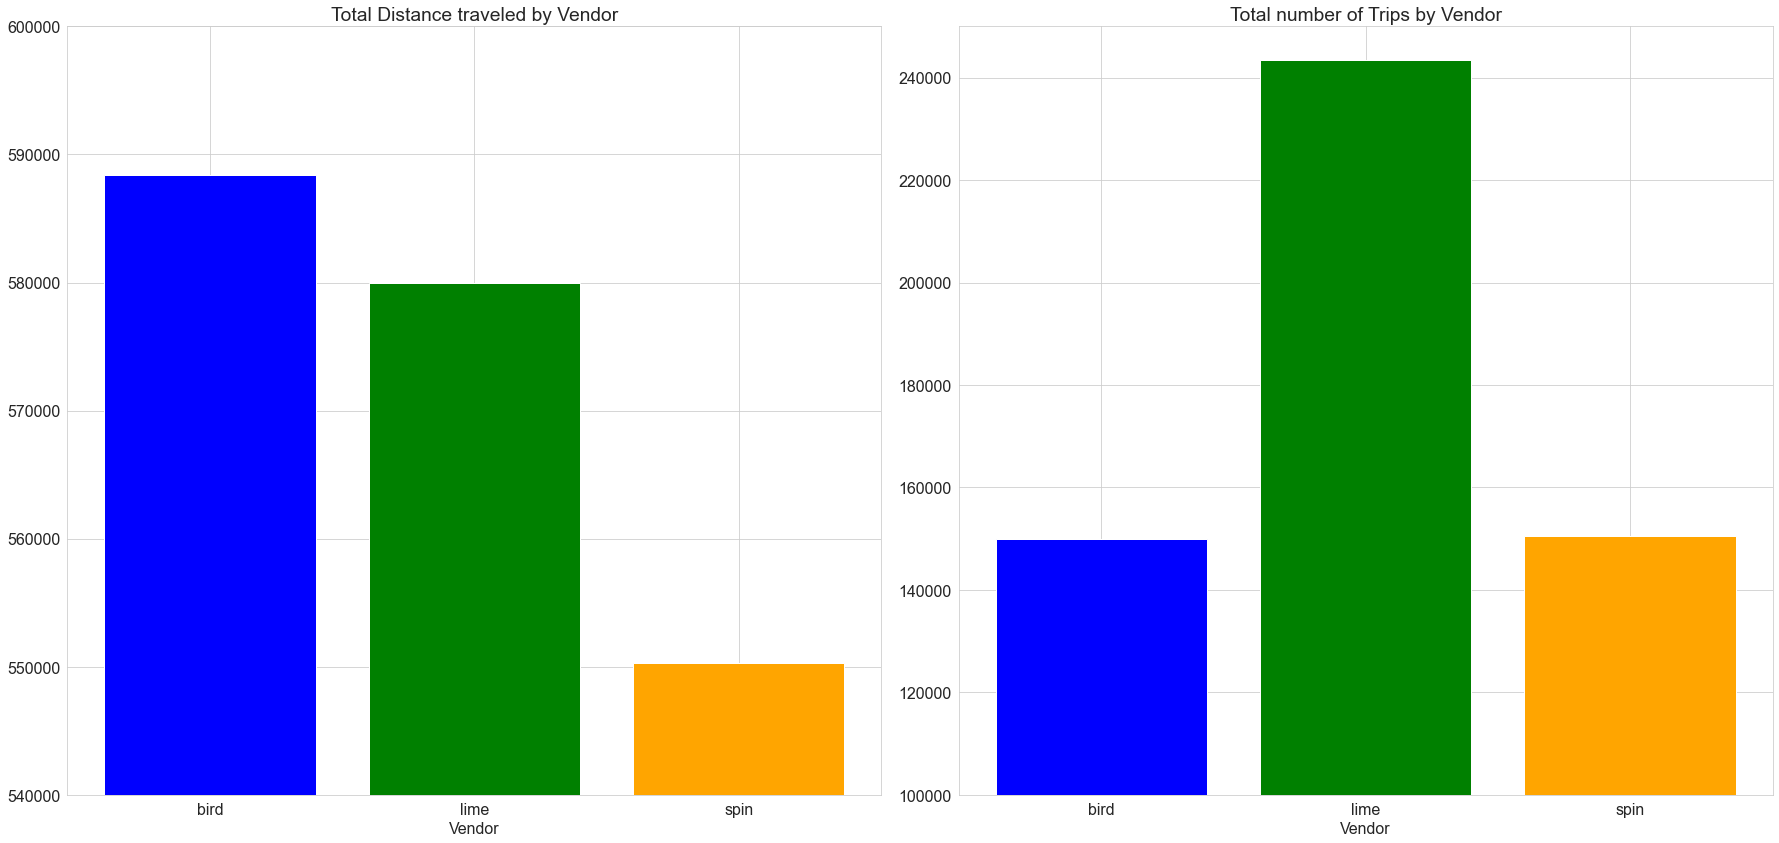

In [148]:
df_by_vendor = df.groupby('Vendor').sum().reset_index()
df_by_vendor_count = df.groupby('Vendor').count().reset_index()
df_by_vendor_count.rename(columns={'Trip ID':'Trip'},inplace=True)
fig,ax = plt.subplots(1,2)

#First plot
ax[0].bar(df_by_vendor['Vendor'],df_by_vendor['Trip Distance (km)'],color=['blue','g','orange'])
ax[0].set_ylim(540000,600000)
ax[0].set_title("Total Distance traveled by Vendor")
ax[0].set_xlabel('Vendor')

#second plot
ax[1].bar(df_by_vendor_count['Vendor'],df_by_vendor_count['Trip'],color=['blue','g','orange'])
ax[1].set_title("Total number of Trips by Vendor")
ax[1].set_ylim(100000,250000)
ax[1].set_xlabel('Vendor')

plt.tight_layout()
plt.show()

In [14]:
weekends =[]
for i in range(0,len(df['Start Time'])):
    if df['Start Time'][i].day_name() in ["Saturday" , "Sunday"]:
        weekends.append(df['Start Time'][i].date())


In [46]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['Day'] = df['Start Time'].dt.day_name()
df_by_day = df.groupby(['Vendor','Day']).count().reset_index()
print(df_by_day)


   Vendor        Day  level_0  index  Trip ID  Start Time  End Time  \
0    bird     Friday    24808  24808    24808       24808     24808   
1    bird     Monday    18100  18100    18100       18100     18100   
2    bird   Saturday    27762  27762    27762       27762     27762   
3    bird     Sunday    23606  23606    23606       23606     23606   
4    bird   Thursday    19560  19560    19560       19560     19560   
5    bird    Tuesday    16394  16394    16394       16394     16394   
6    bird  Wednesday    19675  19675    19675       19675     19675   
7    lime     Friday    39487  39487    39487       39487     39487   
8    lime     Monday    25557  25557    25557       25557     25557   
9    lime   Saturday    48184  48184    48184       48184     48184   
10   lime     Sunday    38486  38486    38486       38486     38486   
11   lime   Thursday    32411  32411    32411       32411     32411   
12   lime    Tuesday    26864  26864    26864       26864     26864   
13   l

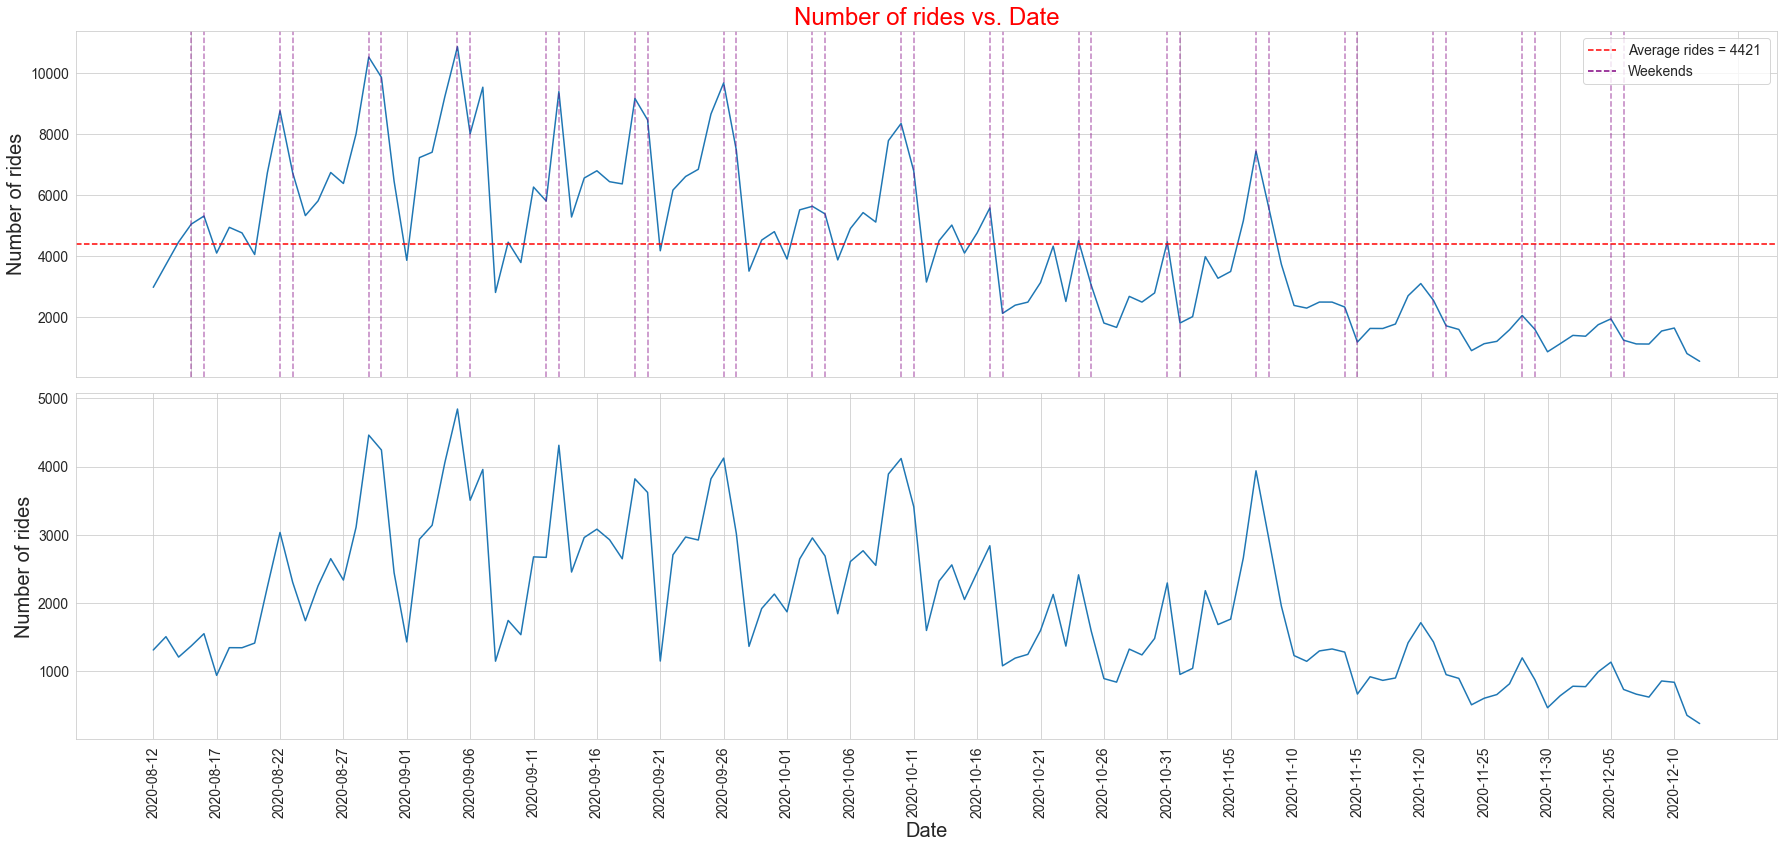

In [139]:
import matplotlib.lines as mlines

# initiating a df grouped by start date.
start_date =df['Start Time'].dt.date
df_by_date = df.groupby(start_date)['Trip ID'].count().reset_index()

#Calculating avarage trip number
avg_ride_num = int(df_by_date['Trip ID'].mean())

# Ploting Number of rides vs. Date
plt.rcParams.update({'font.size': 14})
plt.rcParams["figure.figsize"] = (25,12)

# first plot:
fig , ax= plt.subplots(2,1)
ax[0].plot(df_by_date['Start Time'],df_by_date['Trip ID'])
ax[0].set_xticklabels([])
ax[0].set_ylabel("Number of rides",size=20)


#Drawing weekend lines
avg_line = ax[0].axhline(df_by_date['Trip ID'].mean(),color='red',ls='--',label=f"Average rides = {avg_ride_num} ")
for i in np.arange(dt.date(2020,8,15),dt.date(2020,12,10),dt.timedelta(days=7)):
    ax[0].axvline(x=i,c='purple',ls='--',alpha=0.5)

for i in np.arange(dt.date(2020,8,16),dt.date(2020,12,10),dt.timedelta(days=7)):
    ax[0].axvline(x=i,c='purple',ls='--',alpha=0.5)

#Second plot
df_by_date2 = df.groupby([start_date,"Vendor"])['Trip ID'].count().reset_index()
bird_by_date = df_by_date2[df_by_date2['Vendor']=='bird']
lime_by_date = df_by_date2[df_by_date2['Vendor']=='lime']
spin_by_date = df_by_date2[df_by_date2['Vendor']=='spin']

ax[1].plot(lime_by_date['Start Time'],lime_by_date['Trip ID'])
ax[1].set_xticks(np.arange(min(df_by_date['Start Time']),max(df_by_date['Start Time']),5))
ax[1].set_ylabel("Number of rides",size=20)
weekends_legend = mlines.Line2D([], [], color='purple', ls='--',markersize=15, label='Weekends')
ax[0].legend(handles=[avg_line,weekends_legend])
ax[0].set_title("Number of rides vs. Date",color= 'red',size= 24)
plt.xticks(rotation=90)
plt.xlabel("Date",size=20)
fig.tight_layout()
plt.show()


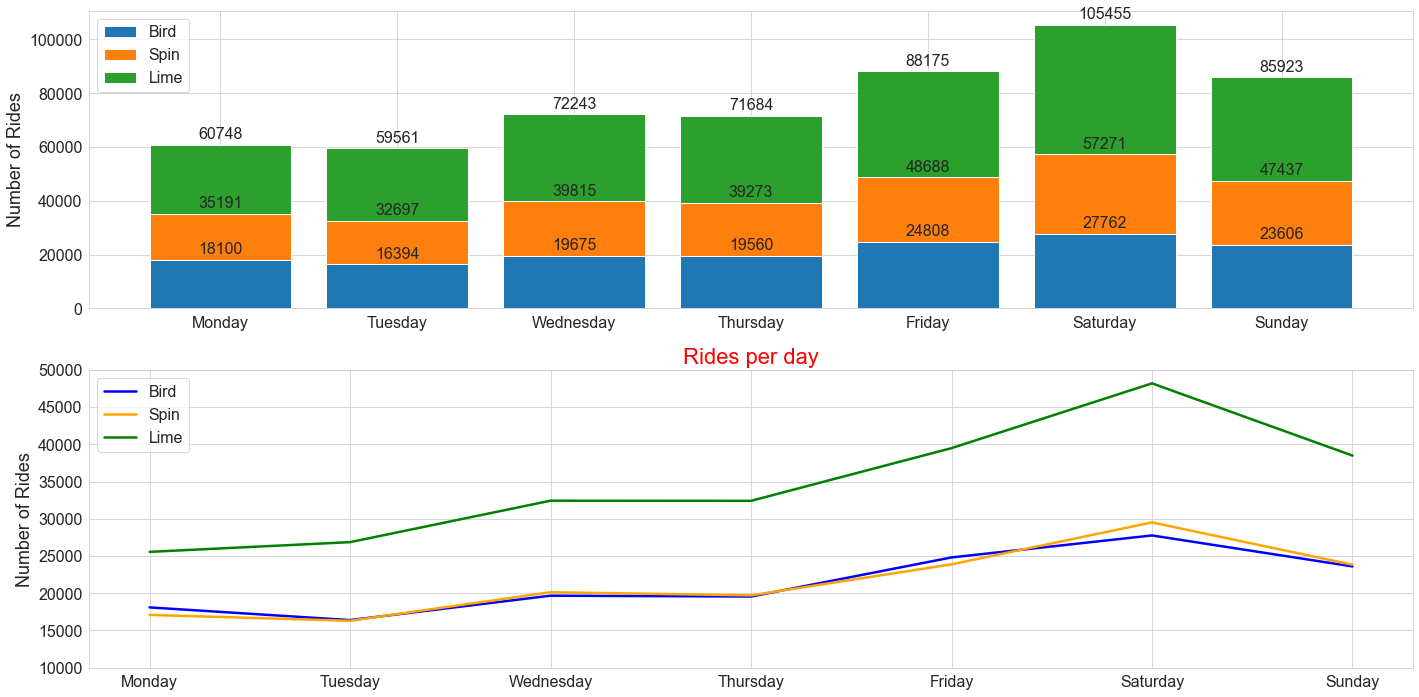

In [147]:
plt.rcParams.update({'font.size': 16})
fig,ax=plt.subplots(2,1)
fig.set_size_inches(20,10)

bird_week = df_by_day[df_by_day['Vendor']=='bird'].set_index('Day').reindex(days).reset_index()
lime_week = df_by_day[df_by_day['Vendor']=='lime'].set_index('Day').reindex(days).reset_index()
spin_week = df_by_day[df_by_day['Vendor']=='spin'].set_index('Day').reindex(days).reset_index()

#First Plot
bird_bar = ax[0].bar(bird_week['Day'],bird_week['Trip ID'],label='Bird')
spin_bar = ax[0].bar(spin_week['Day'],spin_week['Trip ID'],label='Spin',bottom=bird_week['Trip ID'])
lime_bar = ax[0].bar(lime_week['Day'],lime_week['Trip ID'],label='Lime',bottom=np.array(spin_week['Trip ID'])+np.array(bird_week['Trip ID']))
ax[0].set_ylabel("Number of Rides",size=18)

#Second Plot
ax[1].plot(bird_week['Day'],bird_week['Trip ID'],c='blue',label='Bird',lw=2.5)
ax[1].plot(spin_week['Day'],spin_week['Trip ID'],c='orange',label='Spin',lw=2.5)
ax[1].plot(lime_week['Day'],lime_week['Trip ID'],c='green',label='Lime',lw=2.5)
ax[1].set_ylabel("Number of Rides",size=18)


ax[0].bar_label(bird_bar, padding=3)
ax[0].bar_label(spin_bar, padding=3)
ax[0].bar_label(lime_bar, padding=3)
ax[0].legend()
ax[1].legend()
plt.ylim(10000,50000)
plt.title("Rides per day",c='r',size=22)
fig.tight_layout()
plt.show()

In [124]:
df['Hour'] = df['Start Time'].dt.hour
df_by_hour = df.groupby('Hour')['Trip ID'].count().reset_index()
df_by_hour.columns = ['Hour','Trip']
print(df_by_hour)

    Hour   Trip
0      0     15
1      1     11
2      2      7
3      3     37
4      4     21
5      5   2761
6      6   5348
7      7   8758
8      8  12651
9      9  15308
10    10  20540
11    11  27794
12    12  34444
13    13  37703
14    14  41478
15    15  47531
16    16  52569
17    17  58277
18    18  58146
19    19  49743
20    20  39515
21    21  30845
22    22    252
23    23     35


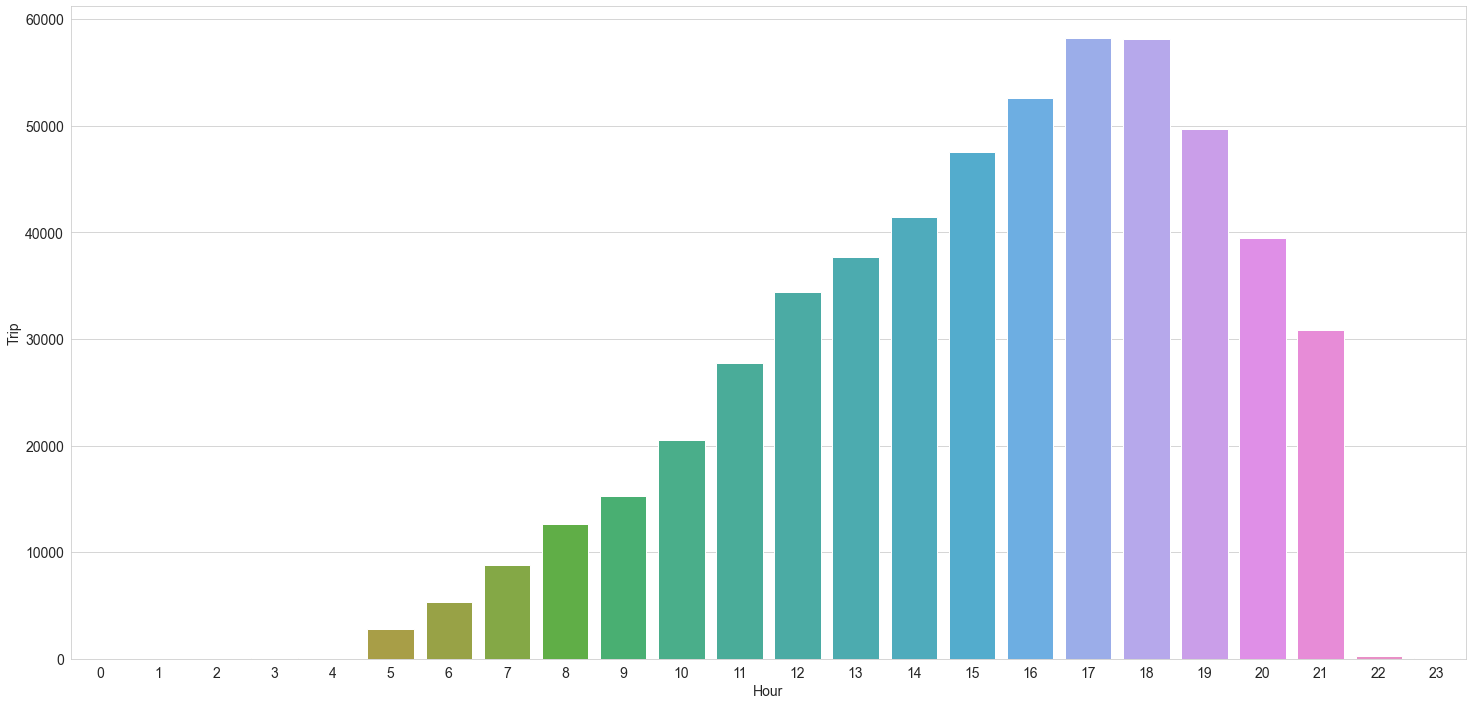

In [125]:
sns.barplot(data=df_by_hour,x='Hour',y='Trip')

plt.show()

In [ ]:
sns.boxplot(data=df,x='Vendor',y='Trip Duration (min)')
# plt.axhline()
plt.show()
print(df[df['Trip Duration (min)']>120])

In [ ]:
df.groupby('Vendor')['Trip ID'].count().reset_index()

In [79]:
lime_bar.head(10)

,Day,Vendor,level_0,index,Trip ID,Start Time,End Time,Trip Distance,Trip Duration,Start Community Area Number,...,Start Centroid Latitude,Start Centroid Longitude,Start Centroid Location,End Centroid Latitude,End Centroid Longitude,End Centroid Location,Trip Duration (min),Trip Distance (km),Trip Duration (h),Avg. Speed (km/h)
0,Monday,lime,25557,25557,25557,25557,25557,25557,25557,25557,...,25557,25557,25557,25557,25557,25557,25557,25557,25557,25557
1,Tuesday,lime,26864,26864,26864,26864,26864,26864,26864,26864,...,26864,26864,26864,26864,26864,26864,26864,26864,26864,26864
2,Wednesday,lime,32428,32428,32428,32428,32428,32428,32428,32428,...,32428,32428,32428,32428,32428,32428,32428,32428,32428,32428
3,Thursday,lime,32411,32411,32411,32411,32411,32411,32411,32411,...,32411,32411,32411,32411,32411,32411,32411,32411,32411,32411
4,Friday,lime,39487,39487,39487,39487,39487,39487,39487,39487,...,39487,39487,39487,39487,39487,39487,39487,39487,39487,39487
5,Saturday,lime,48184,48184,48184,48184,48184,48184,48184,48184,...,48184,48184,48184,48184,48184,48184,48184,48184,48184,48184
6,Sunday,lime,38486,38486,38486,38486,38486,38486,38486,38486,...,38486,38486,38486,38486,38486,38486,38486,38486,38486,38486
